In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import waterfall_chart

In [2]:
year_colors = {
    2014: "red",
    2015: "blue",
    2016: "yellow",
    2017: "green",
    2018: "magenta",
    2019: "purple",
    2020: "brown",
    2021: "orange",
    2022: "pink",
    2023: "cyan"
}

with open('main_data_files/saved_tracks_with_features.json', 'r') as infile:
    saved_tracks_with_features = json.load(infile)

In [3]:
df = pd.json_normalize(saved_tracks_with_features)
df['year_added'] = pd.to_datetime(df['added_at']).dt.year
df = df[["name", "artist", "year_added", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "uri", "added_at"]]

In [4]:
df.head()

,name,artist,year_added,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,uri,added_at
0,Never Admit,Ally Barron,2023,0.653,0.800,4,-6.077,1,0.0502,0.5390,0.000002,0.2800,0.191,90.078,176000,4,spotify:track:2bvYGtlHRl2sKn4EV9F9gy,2023-10-30T16:23:01Z
1,Bare Minimum,NESTA,2023,0.484,0.612,0,-5.723,1,0.0789,0.0704,0.000008,0.4380,0.503,160.629,141650,4,spotify:track:4mKET5vSN6fVxUdBRgAcEa,2023-10-30T16:03:24Z
2,Style,Chris Ruo,2023,0.679,0.612,1,-7.482,1,0.0688,0.5050,0.000000,0.2610,0.164,105.020,171779,4,spotify:track:3VHLjMTyTp39qF84TRna8Y,2023-10-30T16:01:07Z
3,Miss When You Missed Me (feat. Nightly),Knox,2023,0.599,0.726,11,-6.233,1,0.0523,0.2320,0.000000,0.1860,0.798,161.877,174444,4,spotify:track:7Gm6cBK34R3Nyh8RPnyzVa,2023-10-29T03:23:13Z
4,Simon Says,NERIAH,2023,0.757,0.447,0,-8.067,0,0.0920,0.5770,0.000002,0.0949,0.363,124.043,178128,4,spotify:track:3VzzMA7Cmm6CgS523PEpxc,2023-10-29T02:30:44Z


In [5]:
hobby_row = df[df['name'] == 'HOBBY']
print(hobby_row)

       name          artist  year_added  danceability  energy  key  loudness  \
1134  HOBBY  Noël Tsoukalas        2023         0.501   0.728    1    -3.867   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
1134     0        0.143         0.117               0.0     0.187     0.58   

        tempo  duration_ms  time_signature  \
1134  178.189       175615               4   

                                       uri              added_at  
1134  spotify:track:4AHDjEQSEYI3GnyRAIoAR7  2023-11-07T04:58:30Z  


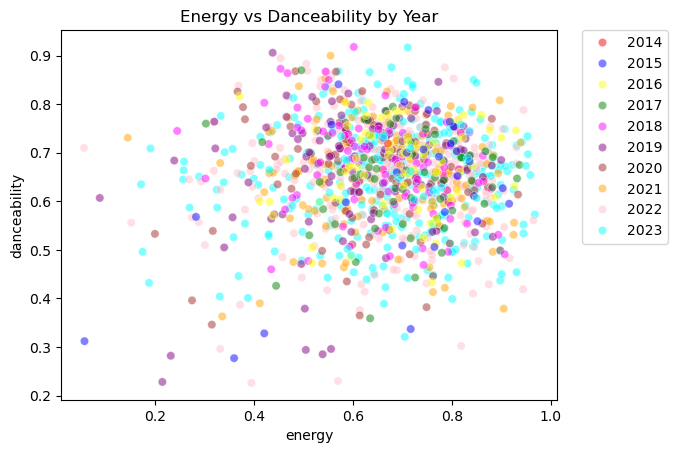

<Figure size 640x480 with 0 Axes>

In [6]:
sns.scatterplot(data=df, x="energy", y="danceability", hue="year_added", palette=year_colors, alpha=0.5)
plt.title("Energy vs Danceability by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

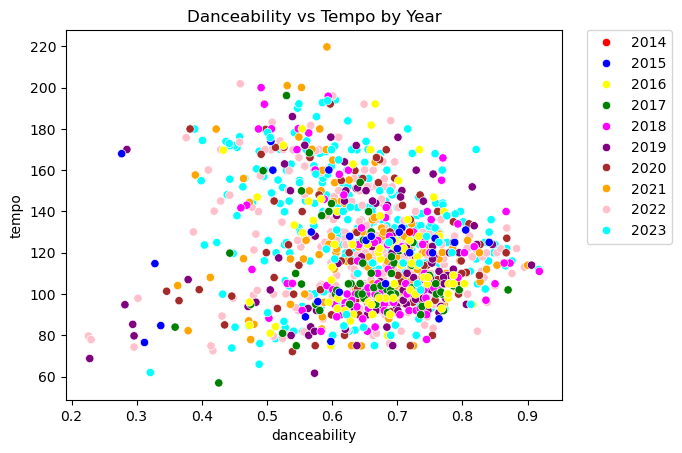

<Figure size 640x480 with 0 Axes>

In [7]:
sns.scatterplot(data=df, x="danceability", y="tempo", hue="year_added", palette=year_colors)
plt.title("Danceability vs Tempo by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


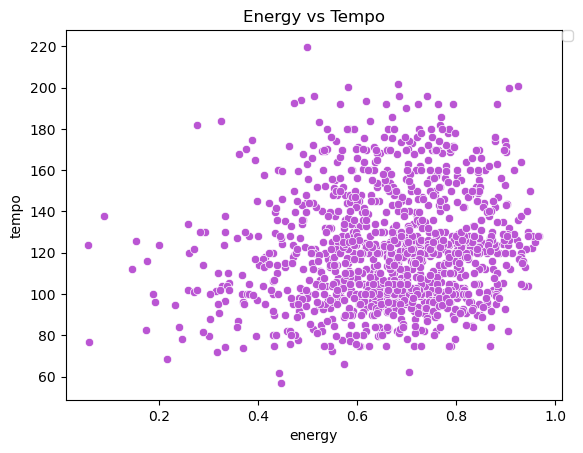

<Figure size 640x480 with 0 Axes>

In [8]:
sns.scatterplot(data=df, x="energy", y="tempo", color='mediumorchid')
plt.title("Energy vs Tempo")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


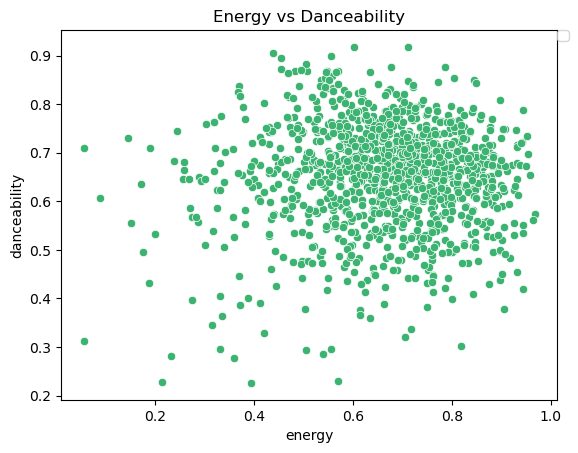

In [9]:
sns.scatterplot(data=df, x="energy", y="danceability", color='mediumseagreen')
plt.title("Energy vs Danceability")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


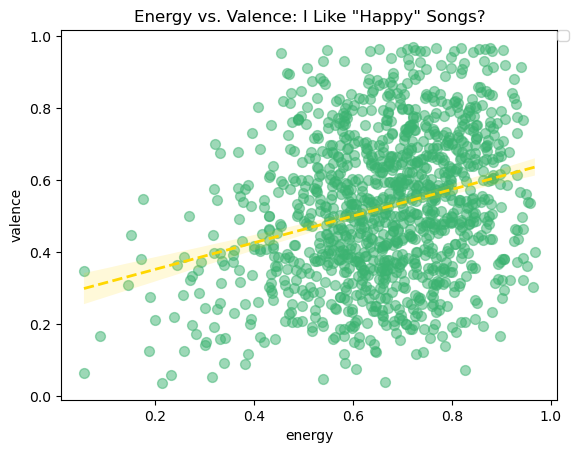

In [10]:
sns.regplot(data=df, x="energy", y="valence", color='mediumseagreen', line_kws={"linewidth": 2, "linestyle": "--", "color": "gold"}, 
            scatter_kws={"s": 50, "alpha": 0.5})
plt.title('Energy vs. Valence: I Like "Happy" Songs?')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

<Axes: xlabel='energy', ylabel='valence'>

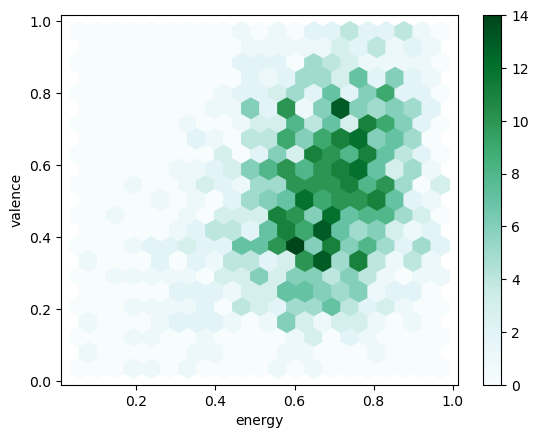

In [11]:
df.plot(kind='hexbin', x='energy', y='valence', gridsize=20)

<Axes: xlabel='energy', ylabel='danceability'>

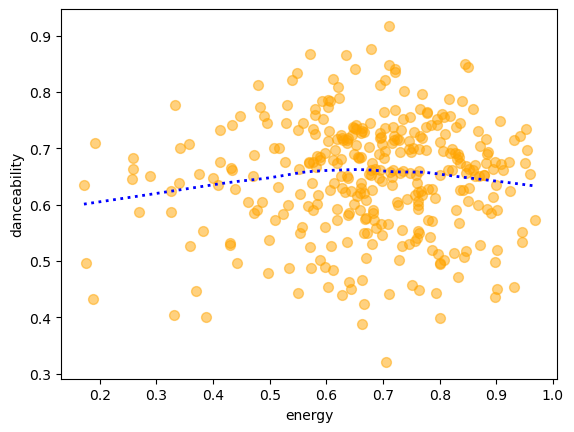

In [12]:
just_2023 = df[df['year_added'] == 2023]
sns.regplot(data=just_2023, x='energy', y='danceability', color='orange', line_kws={"linewidth": 2, "linestyle": 'dotted', "color": "blue"}, scatter_kws={"s": 50, "alpha": 0.5}, lowess=True)

<Axes: xlabel='energy', ylabel='danceability'>

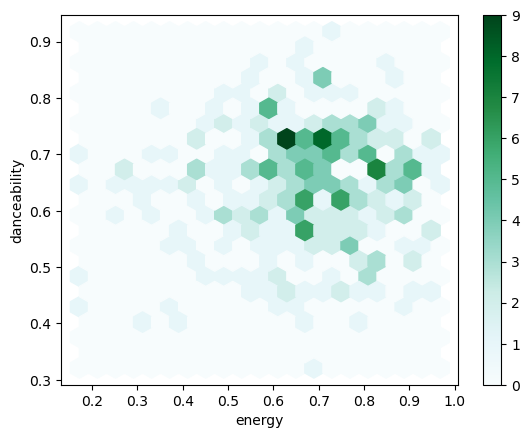

In [13]:
just_2023.plot(kind='hexbin', x='energy', y='danceability', gridsize=20)

In [14]:
just_2023.columns

Index(['name', 'artist', 'year_added', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'uri',
       'added_at'],
      dtype='object')

In [15]:
danceability_df = just_2023[['danceability', 'added_at']]
danceability_df['added_at'] = pd.to_datetime(danceability_df['added_at'])

danceability_df['month'] = danceability_df['added_at'].dt.month
danceability_df['monthly_average'] = danceability_df.groupby('month')['danceability'].transform('mean')

danceability_df = danceability_df.sort_values(by='month', ascending=True)
danceability_df.head(10)
    

/var/folders/0h/96f5xt0s59j0cyt_3yf1j_0w0000gn/T/ipykernel_4916/2574920689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceability_df['added_at'] = pd.to_datetime(danceability_df['added_at'])
/var/folders/0h/96f5xt0s59j0cyt_3yf1j_0w0000gn/T/ipykernel_4916/2574920689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceability_df['month'] = danceability_df['added_at'].dt.month
/var/folders/0h/96f5xt0s59j0cyt_3yf1j_0w0000gn/T/ipykernel_4916/2574920689.py:5: SettingWithCopyWarning: 
A value is try

,danceability,added_at,month,monthly_average
287,0.841,2023-01-20 14:37:47+00:00,1,0.636692
282,0.628,2023-01-31 10:45:22+00:00,1,0.636692
283,0.626,2023-01-28 13:06:03+00:00,1,0.636692
284,0.715,2023-01-27 15:08:05+00:00,1,0.636692
285,0.514,2023-01-27 15:08:03+00:00,1,0.636692
286,0.699,2023-01-25 11:14:57+00:00,1,0.636692
288,0.555,2023-01-20 14:37:46+00:00,1,0.636692
289,0.712,2023-01-16 16:10:11+00:00,1,0.636692
290,0.524,2023-01-16 16:10:07+00:00,1,0.636692
291,0.756,2023-01-13 15:36:52+00:00,1,0.636692


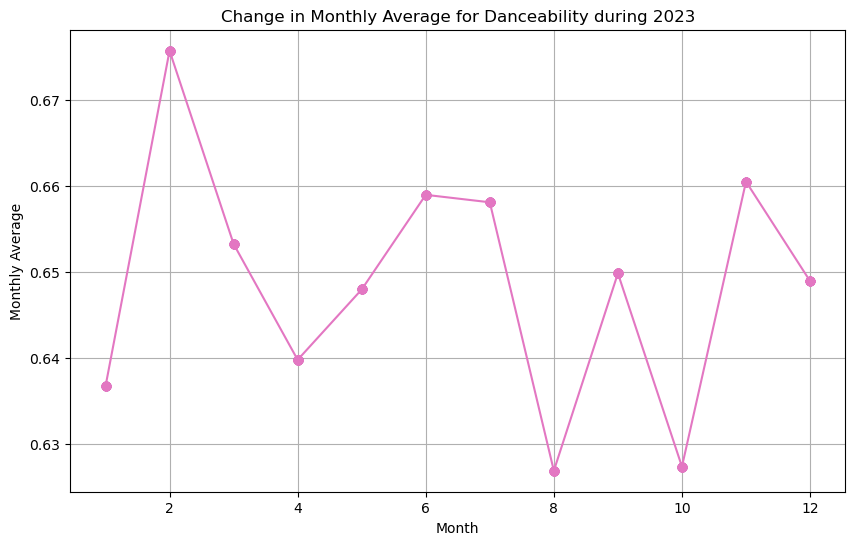

In [16]:
plt.figure(figsize=(10,6))
plt.plot(danceability_df['month'], danceability_df['monthly_average'], marker='o', color='tab:pink')
plt.title('Change in Monthly Average for Danceability during 2023')
plt.xlabel('Month')
plt.ylabel('Monthly Average')
plt.grid(True)
plt.show()

/var/folders/0h/96f5xt0s59j0cyt_3yf1j_0w0000gn/T/ipykernel_4916/1935881817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['added_at'] = pd.to_datetime(energy_df['added_at'])
/var/folders/0h/96f5xt0s59j0cyt_3yf1j_0w0000gn/T/ipykernel_4916/1935881817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['month'] = energy_df['added_at'].dt.month
/var/folders/0h/96f5xt0s59j0cyt_3yf1j_0w0000gn/T/ipykernel_4916/1935881817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

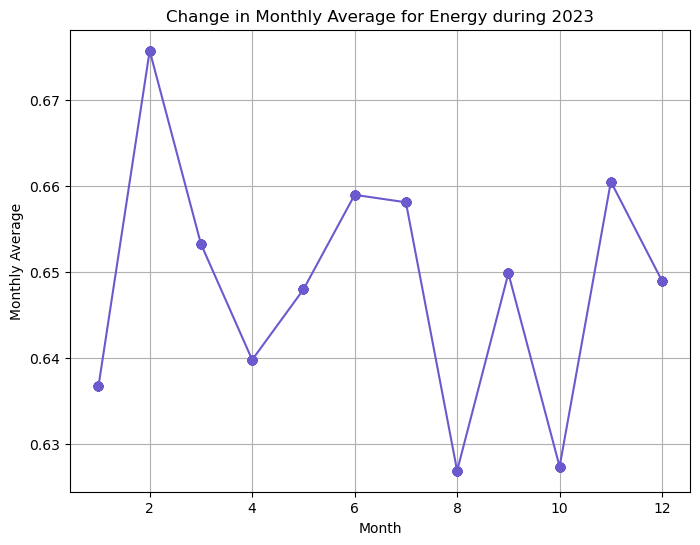

In [17]:
energy_df = just_2023[['danceability', 'added_at']]
energy_df['added_at'] = pd.to_datetime(energy_df['added_at'])

energy_df['month'] = energy_df['added_at'].dt.month
energy_df['monthly_average'] = energy_df.groupby('month')['danceability'].transform('mean')

energy_df = energy_df.sort_values(by='month', ascending=True)

plt.figure(figsize=(8,6))
plt.plot(energy_df['month'], energy_df['monthly_average'], marker='o', color='slateblue')
plt.title('Change in Monthly Average for Energy during 2023')
plt.xlabel('Month')
plt.ylabel('Monthly Average')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Danceability vs. Valence: 2023')

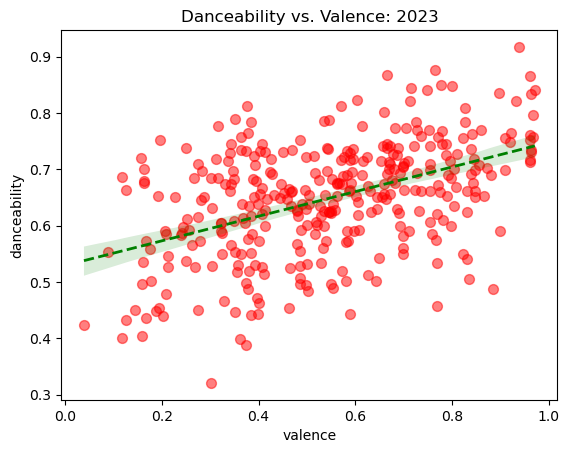

In [18]:
sns.regplot(data=just_2023, x='valence', y='danceability', color='red', line_kws={"linewidth": 2, "linestyle": "--", "color": "green"}, scatter_kws={"s": 50, "alpha": 0.5})
plt.title('Danceability vs. Valence: 2023')

In [19]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

feature_means_dict = {}
for feature in features:
    mean = df[feature].mean()
    feature_means_dict[feature] = mean

feature_means_dict

{'danceability': 0.652525641025641,
 'energy': 0.6632774358974358,
 'key': 4.97948717948718,
 'loudness': -6.191027350427351,
 'mode': 0.6982905982905983,
 'speechiness': 0.0697005982905983,
 'acousticness': 0.204902684017094,
 'instrumentalness': 0.011149561316239315,
 'liveness': 0.1650682051282051,
 'valence': 0.5240328205128205,
 'tempo': 121.42319572649572}

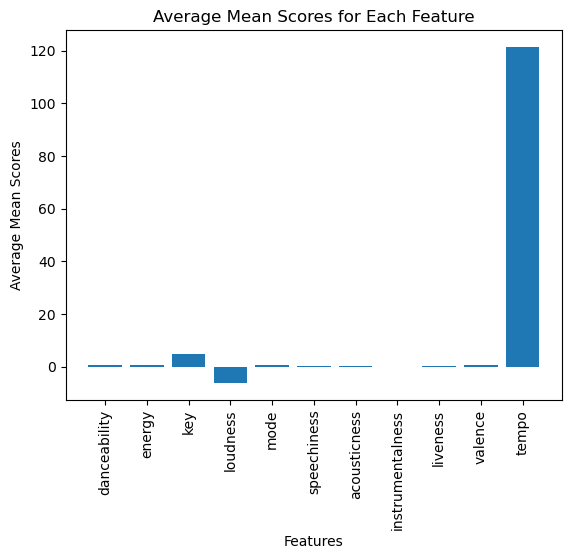

In [20]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

feature_means_dict = {}
for feature in features:
    mean = df[feature].mean()
    feature_means_dict[feature] = mean

plt.bar(feature_means_dict.keys(), feature_means_dict.values())
plt.title("Average Mean Scores for Each Feature")
plt.xlabel("Features")
plt.ylabel("Average Mean Scores")
plt.xticks(rotation=90)
plt.show()

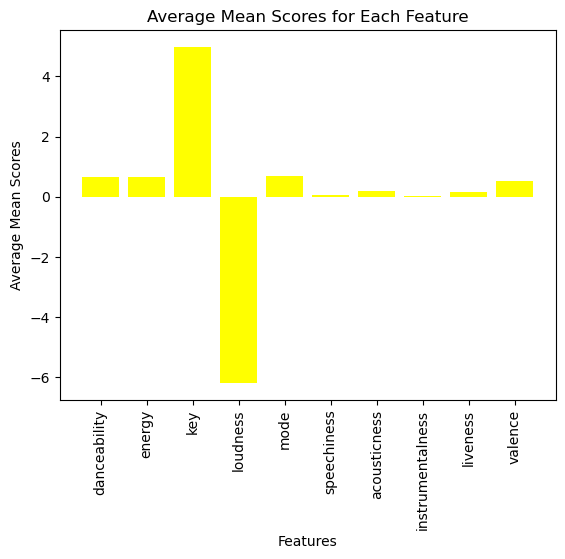

In [21]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]

feature_means_dict = {}
for feature in features:
    mean = df[feature].mean()
    feature_means_dict[feature] = mean

plt.bar(feature_means_dict.keys(), feature_means_dict.values(), color='yellow')
plt.title("Average Mean Scores for Each Feature")
plt.xlabel("Features")
plt.ylabel("Average Mean Scores")
plt.xticks(rotation=90)
plt.show()

In [22]:
highest_danceability_song = df.loc[df['danceability'].idxmax(), 'name']
highest_danceability_song

'Forget to Forget'

In [23]:
top_10_danceability = df.sort_values(by='danceability', ascending=False).head(25)
top_10_danceability[['name', 'artist', 'danceability']]

,name,artist,danceability
945,Forget to Forget,shy martin,0.918
126,Pretty Girl Era,LU KALA,0.917
783,Gone,Charli XCX,0.906
563,Love Songs,Sarah Barrios,0.900
321,I Wanna Feel Good,Chris James,0.895
445,Tommy,Ralph,0.883
405,Veronica,Leah Kate,0.876
276,I Just Came To Dance,Mae Muller,0.876
888,Feels This Good,Kenzie Nimmo,0.873
993,High Without Your Love,Loote,0.870


In [24]:
highest_energy_song = df.loc[df['energy'].idxmax(), ['name', 'artist']]
highest_energy_song

name      Dancing In The Dark - Radio Edit
artist                    Breathe Carolina
Name: 105, dtype: object

In [25]:
top_10_energy = df.sort_values(by='energy', ascending=False).head(25)
top_10_energy[['name', 'artist', 'energy']]

,name,artist,energy
105,Dancing In The Dark - Radio Edit,Breathe Carolina,0.968
396,I'm Good (Blue),David Guetta,0.965
81,"Eli, Can I Come Over Tonight?",Dani Sylvia,0.959
16,Memories,Sam Feldt,0.954
254,10:35 (feat. Tate McRae) - PAJANE Remix,Tiësto,0.953
1156,Thank You (Not So Bad),Dimitri Vegas & Like Mike,0.950
248,Here We Go Again,Oliver Tree,0.945
60,If I Don't,Ally Hills,0.945
530,Beg for You (feat. Rina Sawayama),Charli XCX,0.945
386,Layla - English Version,DJ Robin,0.944


In [26]:
highest_valence_song = df.loc[df['valence'].idxmax(), 'name']
print(highest_valence_song)
top_10_valence= df.sort_values(by='valence', ascending=False).head(25)
top_10_valence[['name', 'artist', 'valence']]

Summer Baby


,name,artist,valence
164,Summer Baby,Jonas Brothers,0.971
353,What A Night - Rowdy In Rio,Flo Rida,0.968
1153,Summer's for Lovers,Glades,0.967
7,Kickin',SUM SUN,0.967
1092,Pumped Up Kicks,Foster The People,0.965
367,IF YOU GO DOWN (I'M GOIN' DOWN TOO),Kelsea Ballerini,0.965
84,Accidentally In Love,TANDM,0.964
252,Kiss Me Already,Wolf and Love,0.964
759,No Judgement,Niall Horan,0.962
249,Good Side,Rachel Grae,0.962


<Axes: xlabel='valence'>

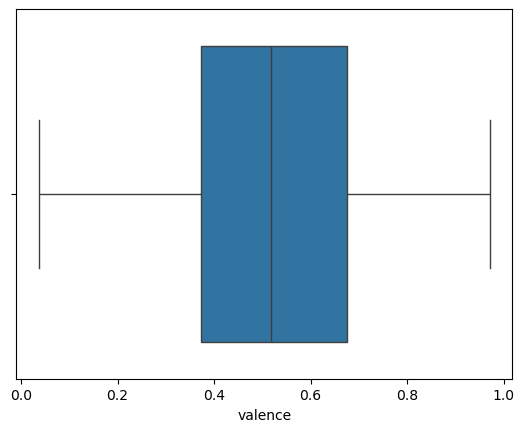

In [27]:
# create a boxplot from the top_10_valence dataframe
sns.boxplot(data=df, x='valence')

<Axes: xlabel='valence'>

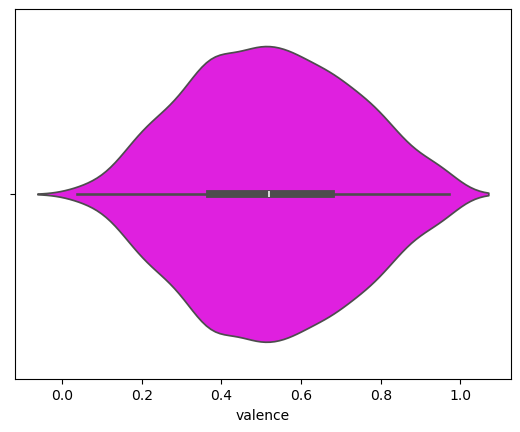

In [28]:
sns.violinplot(data=df, x='valence', color="magenta")

In [29]:
fig = px.histogram(df, x="valence", marginal=None, hover_data=df.columns, color_discrete_sequence=['aqua'])
fig.update_layout(title='Valence Distribution')
mean_valence = df['valence'].mean()
fig.add_vline(x=mean_valence, line_color='red', annotation_text = f"Mean Valence: {mean_valence:.2f}", annotation_position = 'top right')

# Modify the bin size by changing the value of nbins
fig.update_traces(nbinsx=50)

fig.show()

In [30]:
fig = px.scatter(df, x="energy", y="danceability", color="year_added", hover_data=['name', 'artist'])
fig.add_hline(y=df['danceability'].mean(), line_color='green', annotation_text = "Mean Danceability", annotation_position = 'bottom right')
fig.add_vline(x=df['energy'].mean(), line_color='black', annotation_text = "Mean Energy", annotation_position = 'top right')
fig.show()

In [31]:
fig = px.histogram(df, x="danceability", marginal=None, hover_data=df.columns, color_discrete_sequence=['pink'])
fig.update_layout(title='Danceability Distribution')
mean_danceability = df['danceability'].mean()
fig.add_vline(x=mean_danceability, line_color='black', annotation_text = f"Mean Danceability: {mean_danceability:.2f}", annotation_position = 'top right')

In [32]:
fig = px.histogram(df, x="energy", marginal=None, hover_data=df.columns)
fig.update_layout(title='Energy Distribution')
mean_energy = df['energy'].mean()
fig.add_vline(x=mean_energy, line_color='red', annotation_text = f"Mean Energy: {mean_energy:.2f}", annotation_position = 'top right')
fig.show()

In [33]:
fig = px.histogram(df, x="tempo", marginal="rug", hover_data=df.columns, color_discrete_sequence=['gold'],)
fig.show()

<Axes: xlabel='year_added', ylabel='energy'>

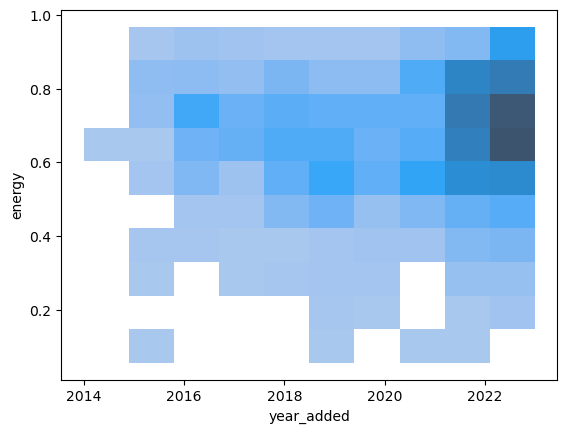

In [34]:
sns.histplot(data=df, x="year_added", y="energy", bins=10, kde=True)

In [35]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "year_added"]

<Axes: xlabel='loudness', ylabel='energy'>

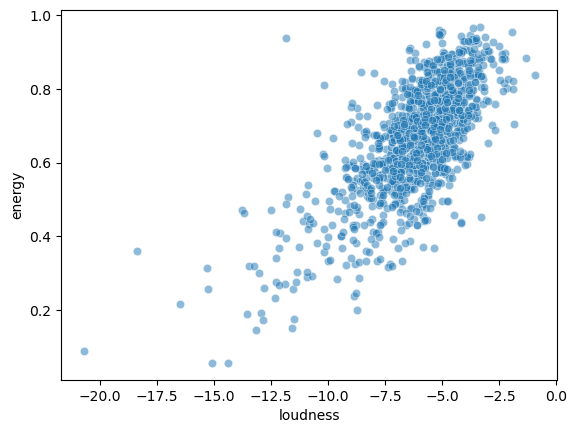

In [36]:
sns.scatterplot(data=df, x="loudness", y="energy", alpha=0.5)

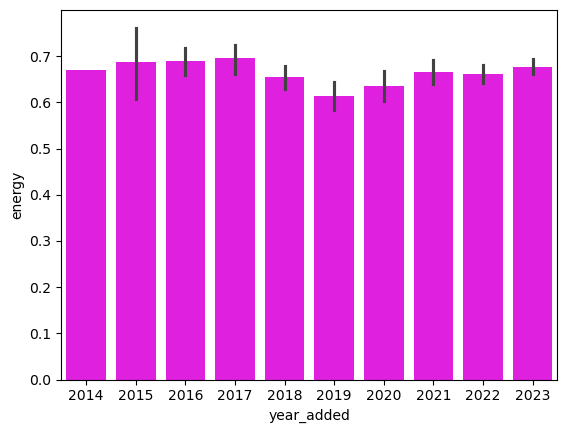

In [37]:
sns.barplot(data=df, y="energy", x="year_added", color='magenta')
plt.show()

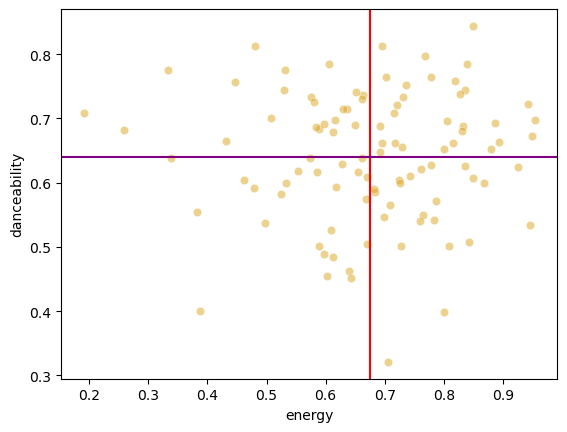

In [38]:
df = df.sort_values(by='added_at', ascending=False)
most_recently_added = df.head(100)
mean_danceability = most_recently_added['danceability'].mean()
mean_energy = most_recently_added['energy'].mean()

sns.scatterplot(data=most_recently_added, x="energy", y="danceability", alpha=0.5, color='goldenrod')
plt.axvline(x=mean_energy, color='red')
plt.axhline(y=mean_danceability, color='purple')
plt.show()

In [39]:
above_danceability_mean = most_recently_added[most_recently_added['danceability'] > mean_danceability].shape[0]
above_energy_mean = most_recently_added[most_recently_added['energy'] > mean_energy].shape[0]

print(f"Number of points above danceability mean: {above_danceability_mean}")
print(f"Number of points above energy mean: {above_energy_mean}")

Number of points above danceability mean: 52
Number of points above energy mean: 52


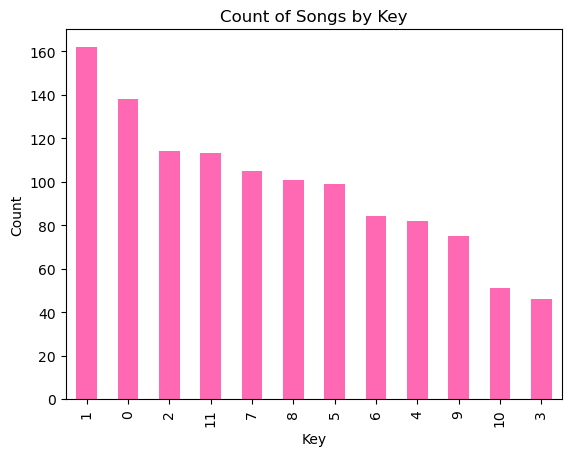

In [40]:
# count the number of occurrences of each key value
key_counts = df['key'].value_counts()

# create a bar plot of the counts
key_counts.plot(kind='bar', color="hotpink")

# set the title and axis labels
plt.title('Count of Songs by Key')
plt.xlabel('Key')
plt.ylabel('Count')

# show the plot
plt.show()

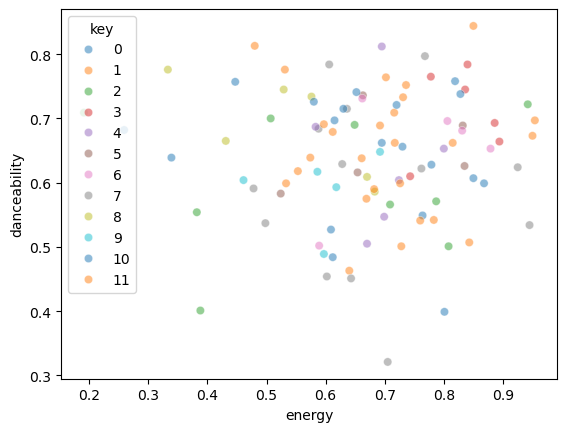

In [41]:
sns.scatterplot(data=most_recently_added, x="energy", y="danceability", hue='key', palette="tab10", alpha=0.5)
plt.show()

In [42]:
def generate_colors(num_colors):
    import random
    # Generate a list of colors with sufficient contrast
    colors = []
    for i in range(num_colors):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        color = f'rgb({r}, {g}, {b})'
        colors.append(color)
    return colors

hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='key', color_discrete_sequence=px.colors.qualitative.Bold, hover_data=hover_columns)
fig.show()

<Axes: >

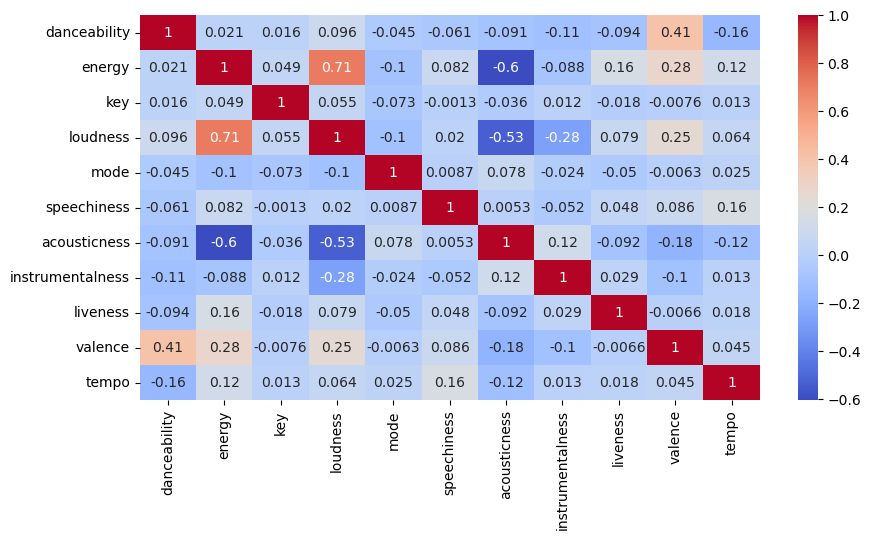

In [43]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

# create a correlation matrix
corr = df[features].corr()

plt.figure(figsize=(10, 5))
# plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [44]:
df['time_signature'].value_counts()

time_signature
4    1137
3      23
5       6
1       4
Name: count, dtype: int64

In [45]:
from icecream import ic
bad_ideas = df[df['name'] == "Bad Ideas"]
ic(bad_ideas)

ic| bad_ideas:          name   artist  year_added  danceability  energy  key  loudness  mode  \
               18  Bad Ideas  Haunter        2023         0.586   0.683    8    -7.176     1   
               
                   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
               18       0.0402         0.086          0.000077     0.389    0.208  140.016   
               
                   duration_ms  time_signature                                   uri  \
               18       188571               4  spotify:track:0pM85dw6rmaZySOd18FbFD   
               
                               added_at  
               18  2023-10-17T18:08:19Z  


,name,artist,year_added,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,uri,added_at
18,Bad Ideas,Haunter,2023,0.586,0.683,8,-7.176,1,0.0402,0.086,0.000077,0.389,0.208,140.016,188571,4,spotify:track:0pM85dw6rmaZySOd18FbFD,2023-10-17T18:08:19Z


In [46]:
hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='key', color_discrete_sequence=px.colors.qualitative.Bold, hover_data=hover_columns)

# Find the index of the song "Shape of You" in the most_recently_added dataframe
song_index = most_recently_added[most_recently_added['name'] == 'Serious'].index[0]

# Get the x and y coordinates of the point corresponding to the song
x_coord = most_recently_added.loc[song_index, 'energy']
y_coord = most_recently_added.loc[song_index, 'danceability']

# Create the arrow and text annotation
fig.add_annotation(
    x=x_coord,
    y=y_coord,
    ax=x_coord-50,
    ay=y_coord-50,
    text="NERIAH's 'Serious'",
    arrowhead=1,
    showarrow=True,
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#ffffff"
    ),
    align="center",
    arrowcolor="black",
    arrowwidth=2,
    arrowsize=1,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="red",
    opacity=0.8
)

# Show the plot
fig.show()

In [47]:
hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='key', color_discrete_sequence=px.colors.qualitative.Bold, hover_data=hover_columns)

# Find the index of the song "Shape of You" in the most_recently_added dataframe
song_index = most_recently_added[most_recently_added['name'] == 'Heart over Mind'].index[0]

# Get the x and y coordinates of the point corresponding to the song
x_coord = most_recently_added.loc[song_index, 'energy']
y_coord = most_recently_added.loc[song_index, 'danceability']

# Create the arrow and text annotation
fig.add_annotation(
    x=x_coord,
    y=y_coord,
    ax=x_coord-50,
    ay=y_coord-50,
    text="Alan Walker, Daya, 'Heart over Mind'",
    arrowhead=1,
    showarrow=True,
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#ffffff"
    ),
    align="center",
    arrowcolor="black",
    arrowwidth=2,
    arrowsize=1,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="red",
    opacity=0.8
)

# Show the plot
fig.show()

In [48]:
hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='key', color_discrete_sequence=px.colors.qualitative.Bold, hover_data=hover_columns)

# Loop through the first ten songs in the dataframe
for i in range(10):
    # Get the name and artist of the song
    song_name = most_recently_added.loc[i, 'name']
    artist_name = most_recently_added.loc[i, 'artist']
    
    # Get the x and y coordinates of the point corresponding to the song
    x_coord = most_recently_added.loc[i, 'energy']
    y_coord = most_recently_added.loc[i, 'danceability']
    
    # Check if the annotation box overlaps with any existing annotation boxes
    overlapping = False
    for annotation in fig['layout']['annotations']:
        if abs(annotation['x'] - x_coord) < 50 and abs(annotation['y'] - y_coord) < 50:
            overlapping = True
            break
    
    # Adjust the ax and ay parameters to prevent overlapping
    ax = x_coord - 50 if not overlapping else x_coord + 50
    ay = y_coord - 50 if not overlapping else y_coord + 50
    
    # Create the arrow and text annotation
    fig.add_annotation(
        x=x_coord,
        y=y_coord,
        ax=ax,
        ay=ay,
        text=f"'{song_name}' by {artist_name}",
        arrowhead=1,
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
        ),
        align="center",
        arrowcolor="black",
        arrowwidth=2,
        arrowsize=1,
        bordercolor="black",
        borderwidth=2,
        borderpad=4,
        bgcolor="red",
        opacity=0.8,
    )

# Show the plot
fig.show()

In [49]:
most_recently_added.head(5)

,name,artist,year_added,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,uri,added_at
1165,Cry Happy,Muryel,2023,0.489,0.597,9,-7.769,0,0.3890,0.7980,0.000006,0.4070,0.554,76.055,142655,4,spotify:track:56DzSSZjgu3JtQZkGmL8Bc,2023-12-15T18:05:30Z
1166,Sapphic Magician,Jamison,2023,0.617,0.586,9,-10.059,0,0.0345,0.0796,0.000002,0.1410,0.529,140.025,195429,4,spotify:track:6E4V9dj4LIgZEm9JBhDiFd,2023-12-15T18:02:16Z
1167,"Fire! (feat. YUQI ((G)I-DLE), JVKE)",Alan Walker,2023,0.764,0.702,1,-5.738,1,0.0471,0.0621,0.000000,0.0800,0.378,125.000,137603,4,spotify:track:5B8VpcIC3EAI3wke3XQoRy,2023-12-15T17:11:16Z
1168,The 26th,Glades,2023,0.736,0.663,5,-5.328,1,0.0248,0.2460,0.000000,0.0868,0.595,101.965,148298,4,spotify:track:6gHWgiTvKD4ZUh0LxYCabQ,2023-12-15T17:06:00Z
1169,Cowgirl (feat. Lourdiz),Nicki Minaj,2023,0.684,0.588,7,-5.418,1,0.0533,0.0219,0.000494,0.1010,0.266,160.008,216000,4,spotify:track:6W7lMqlEHd9FlsyBHsrodz,2023-12-15T16:59:32Z


In [50]:
mean_valence = df['valence'].mean()

In [51]:
mean_valence

0.5240328205128205

In [52]:
# Assuming most_recently_added is your updated DataFrame
hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='tempo', color_continuous_scale='Turbo', hover_data=hover_columns)

# Loop through the first five songs in the dataframe
for i in range(5):
    # Get the name and artist of the song
   # Get the name and artist of the song
    song_name = most_recently_added.iloc[i]['name']
    artist_name = most_recently_added.iloc[i]['artist']
    
    # Get the x and y coordinates of the point corresponding to the song
    x_coord = most_recently_added.iloc[i]['energy']
    y_coord = most_recently_added.iloc[i]['danceability']

    print(f"Song: {song_name}, Artist: {artist_name}, Energy: {x_coord}, Danceability: {y_coord}")  # print the values
    
    # Create the arrow and text annotation
    fig.add_annotation(
        x=x_coord,
        y=y_coord,
        ax=x_coord-50,
        ay=y_coord-80,
        text=f"'{song_name}' by {artist_name}",
        arrowhead=1,
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
        ),
        align="center",
        arrowcolor="black",
        arrowwidth=2,
        arrowsize=1,
        bordercolor="black",
        borderwidth=2,
        borderpad=4,
        bgcolor="red",
        opacity=0.8,
    )

# Show the plot
fig.show()
#fig.write_html("images/plots/energy_vs_danceability_with_annotations.html")

Song: Cry Happy, Artist: Muryel, Energy: 0.597, Danceability: 0.489
Song: Sapphic Magician, Artist: Jamison, Energy: 0.586, Danceability: 0.617
Song: Fire! (feat. YUQI ((G)I-DLE), JVKE), Artist: Alan Walker, Energy: 0.702, Danceability: 0.764
Song: The 26th, Artist: Glades, Energy: 0.663, Danceability: 0.736
Song: Cowgirl (feat. Lourdiz), Artist: Nicki Minaj, Energy: 0.588, Danceability: 0.684


In [61]:
most_recently_added[['name', 'artist', 'key']].head(15)

,name,artist,key
1165,Cry Happy,Muryel,9
1166,Sapphic Magician,Jamison,9
1167,"Fire! (feat. YUQI ((G)I-DLE), JVKE)",Alan Walker,1
1168,The 26th,Glades,5
1169,Cowgirl (feat. Lourdiz),Nicki Minaj,7
1157,Boys Like You,Charlotte Lawrence,11
1158,He's A 10,JESSIA,1
1159,First Time,Maisy Kay,8
1160,convenient,Casey Baer,2
1161,Boyfriend,Wingtip,2


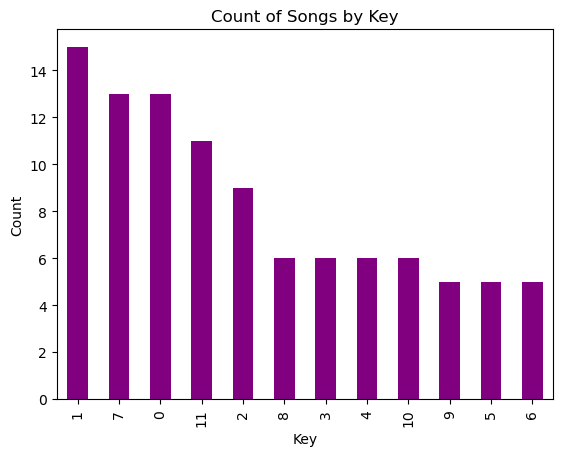

In [62]:
most_recently_added['key'].value_counts().plot(kind='bar', color='purple')
plt.title('Count of Songs by Key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()
